In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('NFLX.csv',index_col='Date')

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-25,359.000000,367.040009,357.440002,366.230011,366.230011,8473800
2019-03-26,367.869995,368.380005,358.019989,359.970001,359.970001,7666500
2019-03-27,361.000000,362.470001,350.369995,353.369995,353.369995,7852400
2019-03-28,354.489990,355.940002,349.200012,354.609985,354.609985,4361000
2019-03-29,357.160004,358.250000,353.709991,356.559998,356.559998,4705600


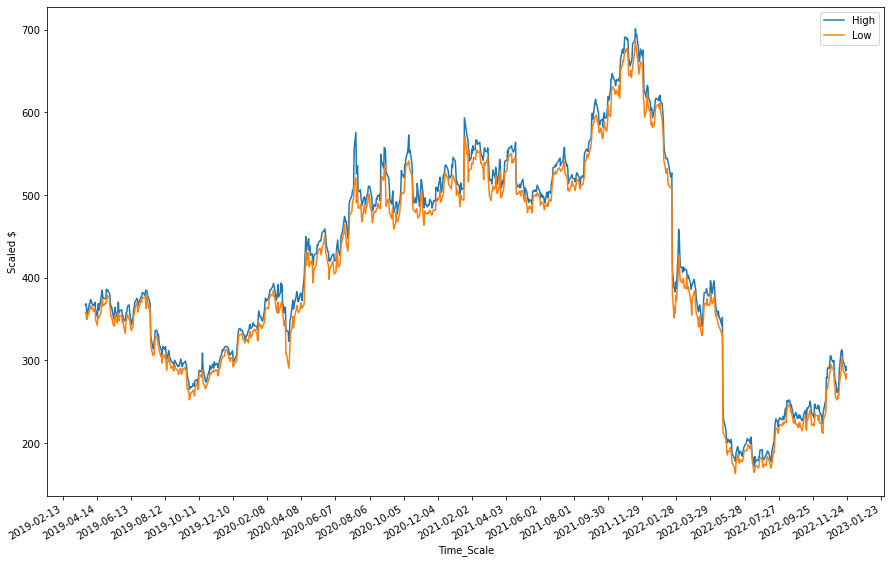

In [6]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index.values]

plt.plot(x_dates, data['High'], label = 'High')
plt.plot(x_dates, data['Low'], label = 'Low')
plt.xlabel('Time_Scale')
plt.ylabel('Scaled $')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

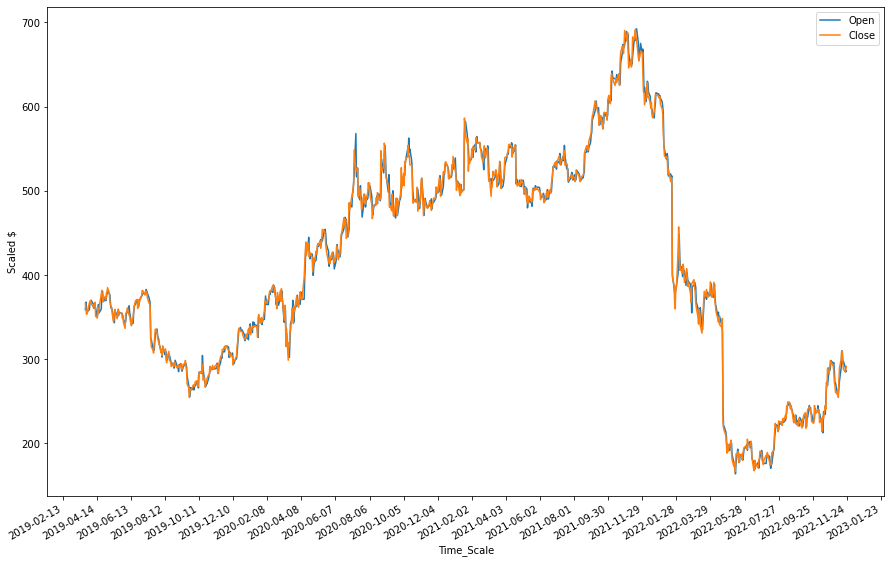

In [7]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index.values]

plt.plot(x_dates, data['Open'], label = 'Open')
plt.plot(x_dates, data['Close'], label = 'Close')
plt.xlabel('Time_Scale')
plt.ylabel('Scaled $')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [9]:
# Preprocessing
y = data['Close']
X = data.iloc[:,0:3]

In [10]:
X.head()

,Open,High,Low
Date,,,
2019-03-25,359.000000,367.040009,357.440002
2019-03-26,367.869995,368.380005,358.019989
2019-03-27,361.000000,362.470001,350.369995
2019-03-28,354.489990,355.940002,349.200012
2019-03-29,357.160004,358.250000,353.709991


In [11]:
y.head()

Date
2019-03-25    366.230011
2019-03-26    359.970001
2019-03-27    353.369995
2019-03-28    354.609985
2019-03-29    356.559998
Name: Close, dtype: float64

In [16]:
# Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X.values)
X_scaled = pd.DataFrame(columns = X.columns,
                       data = X_scaled,
                       index = X.index)


In [17]:
X_scaled.head()

,Open,High,Low
Date,,,
2019-03-25,-0.405156,-0.389460,-0.369471
2019-03-26,-0.336327,-0.379127,-0.364927
2019-03-27,-0.389637,-0.424701,-0.424866
2019-03-28,-0.440153,-0.475055,-0.434033
2019-03-29,-0.419434,-0.457242,-0.398696


In [18]:
X_scaled.shape

(927, 3)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(741, 3)
(186, 3)
(741,)
(186,)


In [29]:
X_test.head()

,Open,High,Low
Date,,,
2019-11-15,-0.936000,-0.938657,-0.916916
2020-12-04,0.669567,0.670532,0.697682
2019-05-07,-0.265481,-0.290216,-0.303890
2019-06-28,-0.317781,-0.354759,-0.311255
2022-03-14,-0.562523,-0.587794,-0.585879


In [69]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
predicted = model.predict(X_test)

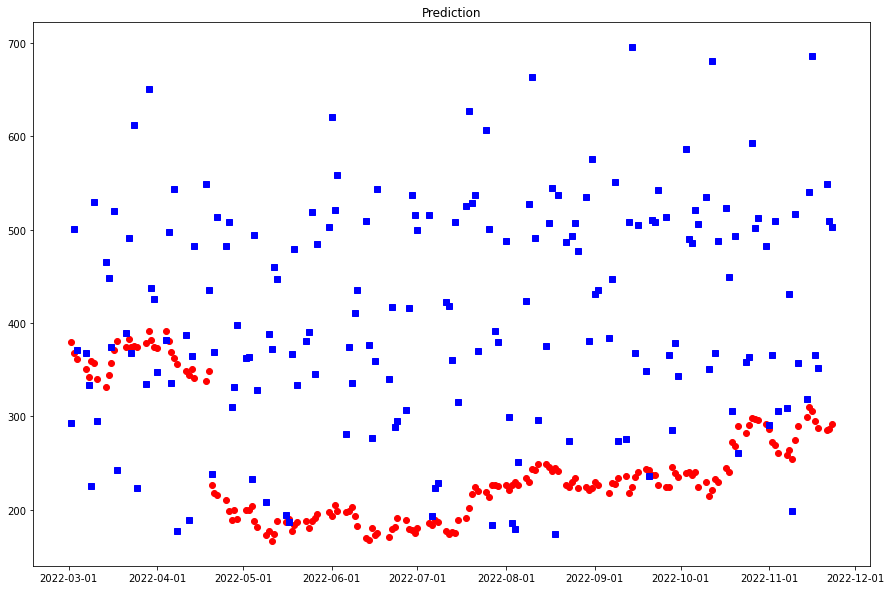

In [61]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in X_test.index.values]

plt.plot(x_dates, y_test,'ro')
plt.plot(x_dates, predicted,'bs')

plt.title('Prediction')
# plt.xlabel('Time_Scale')
# plt.ylabel('Scaled $')
# plt.legend()
# plt.gcf().autofmt_xdate()
plt.show()

In [62]:
rmse = mean_squared_error(y_test,predicted,squared=False)
mape = mean_absolute_percentage_error(y_test,predicted)

print('RMSE = ', rmse)
print('MAPE = ', mape)

RMSE =  213.18904116536552
MAPE =  0.8109069571684664


In [40]:
def data_split(data,n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps + 1):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i:i+n_steps, -1])
    return np.array(X), np.array(y)

In [41]:
X1, y1 = data_split(data.values,n_steps=2)

In [44]:
train_split = 0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_idx = data.index

In [45]:
split_idx

741

In [46]:
date_idx

Index(['2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29',
       '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05',
       ...
       '2022-11-10', '2022-11-11', '2022-11-14', '2022-11-15', '2022-11-16',
       '2022-11-17', '2022-11-18', '2022-11-21', '2022-11-22', '2022-11-23'],
      dtype='object', name='Date', length=927)

In [47]:
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, X_test = y1[:split_idx], y1[split_idx:]

X_train_date, X_test_date = date_idx[:split_idx], date_idx[split_idx:]

print(X1.shape,X_train.shape,X_test.shape,y_test.shape)

(926, 2, 5) (741, 2, 5) (185, 2) (186,)


In [50]:
X_train

array([[[359.      , 367.040009, 357.440002, 366.230011, 366.230011],
        [367.869995, 368.380005, 358.019989, 359.970001, 359.970001]],

       [[367.869995, 368.380005, 358.019989, 359.970001, 359.970001],
        [361.      , 362.470001, 350.369995, 353.369995, 353.369995]],

       [[361.      , 362.470001, 350.369995, 353.369995, 353.369995],
        [354.48999 , 355.940002, 349.200012, 354.609985, 354.609985]],

       ...,

       [[386.609985, 391.290009, 375.579987, 390.799988, 390.799988],
        [387.329987, 397.75    , 382.130005, 394.519989, 394.519989]],

       [[387.329987, 397.75    , 382.130005, 394.519989, 394.519989],
        [391.600006, 395.      , 383.709991, 386.23999 , 386.23999 ]],

       [[391.600006, 395.      , 383.709991, 386.23999 , 386.23999 ],
        [388.929993, 389.220001, 375.209991, 380.029999, 380.029999]]])

In [51]:
X_scaled.shape

(927, 3)

In [55]:
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

X_train_date, X_test_date = date_idx[:split_idx], date_idx[split_idx:]

print(X_scaled.shape,X_train.shape,X_test.shape,y_test.shape)

(927, 3) (741, 3) (186, 3) (186,)


In [70]:
model.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)

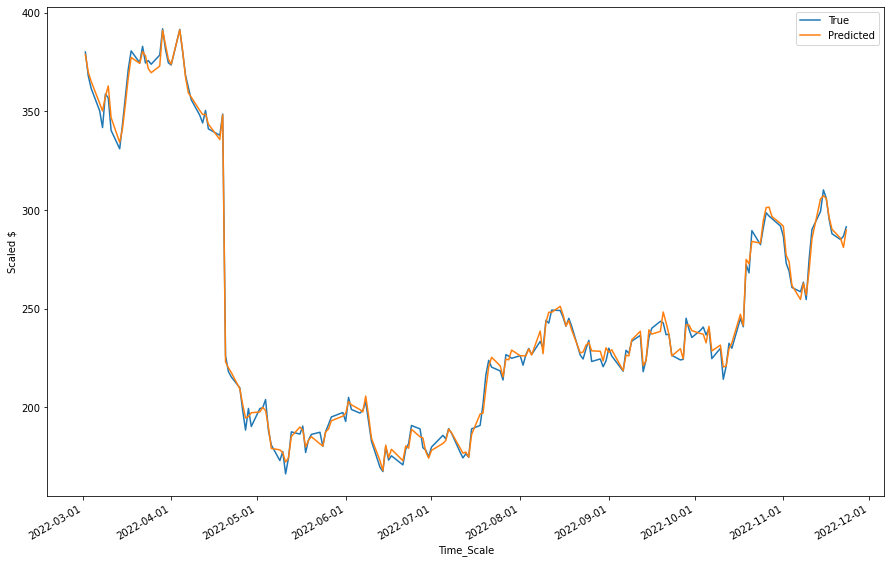

In [72]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in X_test.index.values]

plt.plot(x_dates, y_test, label = 'True')
plt.plot(x_dates, y_pred, label = 'Predicted')
plt.xlabel('Time_Scale')
plt.ylabel('Scaled $')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [73]:
rmse = mean_squared_error(y_test,y_pred,squared=False)
mape = mean_absolute_percentage_error(y_test,predicted)

print('RMSE = ', rmse)
print('MAPE = ', mape)

RMSE =  3.214606856987677
MAPE =  0.8109069571684664


In [74]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

model.fit(X_train,y_train)

KNeighborsRegressor()

In [75]:
y_pred = model.predict(X_test)

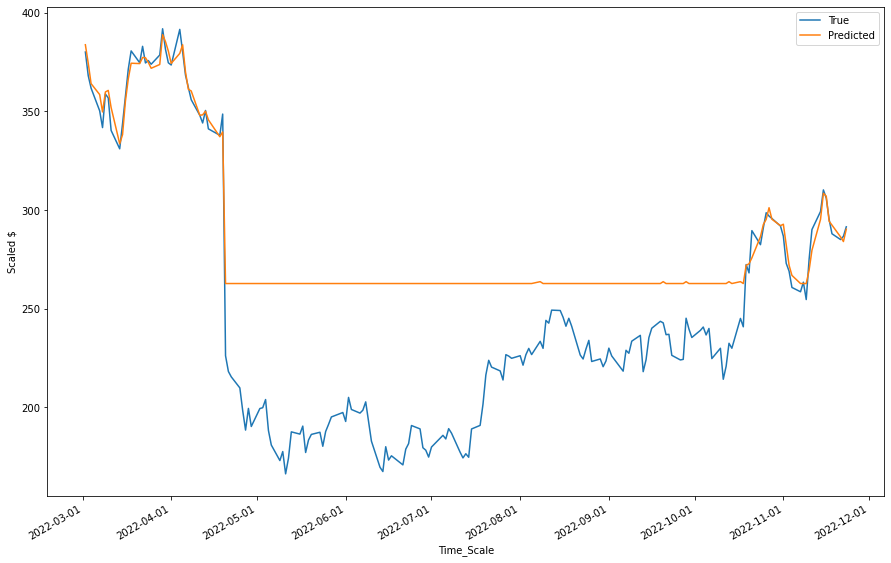

In [76]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in X_test.index.values]

plt.plot(x_dates, y_test, label = 'True')
plt.plot(x_dates, y_pred, label = 'Predicted')
plt.xlabel('Time_Scale')
plt.ylabel('Scaled $')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [77]:
rmse = mean_squared_error(y_test,y_pred,squared=False)
mape = mean_absolute_percentage_error(y_test,predicted)

print('RMSE = ', rmse)
print('MAPE = ', mape)

RMSE =  47.91933155779154
MAPE =  0.8109069571684664
